In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import random
import math

import torch
import torch.nn as nn
import time

## Load data

Load the data into tensors.

In [2]:
df = pd.read_csv('data/train.csv')
print(df.shape)
df.head()

(17892, 41)


,ConfirmedCases,Country/Region,Date,Fatalities,ForecastId,Id,Lat,Long,Province/State,Place,...,GDP based on PPP share of world total,Unemployment rate,Population,Life expectancy,Population density,Median age,Urban population %,Hospital beds,Sex ratio,Death rate from lung diseases
0,0.0,Afghanistan,2020-01-22,0.0,NaN,1.0,33.0,65.0,NaN,Afghanistan,...,0.054,NaN,36.51,64.5,60.0,18.0,25.0,0.5,1.03,37.62
1,0.0,Afghanistan,2020-01-23,0.0,NaN,2.0,33.0,65.0,NaN,Afghanistan,...,0.054,NaN,36.51,64.5,60.0,18.0,25.0,0.5,1.03,37.62
2,0.0,Afghanistan,2020-01-24,0.0,NaN,3.0,33.0,65.0,NaN,Afghanistan,...,0.054,NaN,36.51,64.5,60.0,18.0,25.0,0.5,1.03,37.62
3,0.0,Afghanistan,2020-01-25,0.0,NaN,4.0,33.0,65.0,NaN,Afghanistan,...,0.054,NaN,36.51,64.5,60.0,18.0,25.0,0.5,1.03,37.62
4,0.0,Afghanistan,2020-01-26,0.0,NaN,5.0,33.0,65.0,NaN,Afghanistan,...,0.054,NaN,36.51,64.5,60.0,18.0,25.0,0.5,1.03,37.62


In [3]:
for col in df.columns:
    print("'"+col+"',")

'ConfirmedCases',
'Country/Region',
'Date',
'Fatalities',
'ForecastId',
'Id',
'Lat',
'Long',
'Province/State',
'Place',
'Day',
'Cases/day',
'Fatals/day',
'Cases yesterday',
'Cases last week',
'Cases 2weeks ago',
'Cases 3weeks ago',
'Fatals yesterday',
'Fatals last week',
'Fatals 2weeks ago',
'Fatals 3weeks ago',
'Days since 1st case',
'Days since 10th case',
'Days since 100th case',
'Days since 1st fatal',
'Days since 10th fatal',
'Days since 100th fatal',
'Smoking rate',
'Nominal GDP',
'GDP based on PPP',
'GDP per capita',
'GDP based on PPP share of world total',
'Unemployment rate',
'Population',
'Life expectancy',
'Population density',
'Median age',
'Urban population %',
'Hospital beds',
'Sex ratio',
'Death rate from lung diseases',


Start from predicting confirmed cases.

In [4]:
# Select the top ten features based on the Feature Selection MethodExtra Tree Regressor
col_target = 'Cases/day'
col_features = [
    'Cases last week', 
    'Cases yesterday', 
    'Fatals yesterday', 
    'Fatals last week', 
    'Smoking rate', 
    'Cases 2weeks ago', 
    'Days since 1st case', 
    'Hospital beds', 
    'Days since 100th fatal', 
    'Days since 10th fatal'
]

In [5]:
# Fill in missing values by column median
for col in col_features:
    df[col] = df[col].fillna(df[col].median())

In [6]:
pd.isna(df[col_features]).sum()

Cases last week           0
Cases yesterday           0
Fatals yesterday          0
Fatals last week          0
Smoking rate              0
Cases 2weeks ago          0
Days since 1st case       0
Hospital beds             0
Days since 100th fatal    0
Days since 10th fatal     0
dtype: int64

In [7]:
len(col_features)

10

In [8]:
# Original
#Xdata = np.array(df[col_features])
#Ydata = np.array(df[col_target])

# Normalized
Xscaler = MinMaxScaler()
Xscaler.fit(np.array(df[col_features]))
Xdata = Xscaler.transform(np.array(df[col_features]))

Yscaler = MinMaxScaler()
Yscaler.fit(np.array(df[col_target]).reshape(-1, 1))
Ydata = Yscaler.transform(np.array(df[col_target]).reshape(-1, 1)).reshape(1, -1)[0]

In [9]:
# De-normalize Ydata
Ydata2 = Yscaler.inverse_transform(Ydata.reshape(-1, 1)).reshape(1, -1)[0]
print(np.array(df[col_target])[-10:])
print(Ydata2[-10:])

[0 0 0 2 0 0 0 1 0 0]
[0. 0. 0. 2. 0. 0. 0. 1. 0. 0.]


In [10]:
# Original
print(max(Ydata))
print(min(Ydata))

1.0
0.0


In [11]:
# Normalized
print(max(Ydata))
print(min(Ydata))

1.0
0.0


In [12]:
# Original
print(Xdata)
print(Ydata)

[[0.00047269 0.00416052 0.00626566 ... 0.01423143 0.         0.        ]
 [0.00047269 0.00416052 0.00626566 ... 0.01423143 0.         0.        ]
 [0.00047269 0.00416052 0.00626566 ... 0.01423143 0.         0.        ]
 ...
 [0.00052831 0.00416052 0.00626566 ... 0.12096717 0.         0.        ]
 [0.00055611 0.00422762 0.00626566 ... 0.12096717 0.         0.        ]
 [0.00055611 0.00416052 0.00626566 ... 0.12096717 0.         0.        ]]
[0.57219868 0.57219868 0.57219868 ... 0.57222751 0.57219868 0.57219868]


In [13]:
# Normalized
print(Xdata)
print(Ydata)

[[0.00047269 0.00416052 0.00626566 ... 0.01423143 0.         0.        ]
 [0.00047269 0.00416052 0.00626566 ... 0.01423143 0.         0.        ]
 [0.00047269 0.00416052 0.00626566 ... 0.01423143 0.         0.        ]
 ...
 [0.00052831 0.00416052 0.00626566 ... 0.12096717 0.         0.        ]
 [0.00055611 0.00422762 0.00626566 ... 0.12096717 0.         0.        ]
 [0.00055611 0.00416052 0.00626566 ... 0.12096717 0.         0.        ]]
[0.57219868 0.57219868 0.57219868 ... 0.57222751 0.57219868 0.57219868]


In [14]:
random.seed(420)
X_train, X_test, y_train, y_test = train_test_split(Xdata, Ydata, test_size=0.2)

In [15]:
np.shape(X_train)

(14313, 10)

In [16]:
Xtrain = torch.Tensor(X_train)
Xtest = torch.Tensor(X_test)
ytrain = torch.Tensor(y_train)
ytest = torch.Tensor(y_test)

Load the data into dataloaders(batches) for stochastic gradient descent.

In [17]:
train = torch.utils.data.TensorDataset(Xtrain, ytrain)
test = torch.utils.data.TensorDataset(Xtest, ytest)

# Set batch size to be the square root of the data points
train_loader = torch.utils.data.DataLoader(train, batch_size=math.ceil(len(Xtrain)**(1/2)),num_workers=2)
test_loader = torch.utils.data.DataLoader(test, batch_size=math.ceil(len(Xtest)**(1/2)), shuffle=False,num_workers=2)

## Build MLP model

Build a three layer neural network for our task. With PyTorch, we only need to specify the forward layers and we get the backpropgation for free.

In [18]:
class My_Net(nn.Module): 
    def __init__(self, input_size, num_neurons):
        super(My_Net, self).__init__()
        # 3 hidden layers
        self.layer_1 = nn.Linear(input_size, num_neurons)
        self.layer_2 = nn.Linear(num_neurons, num_neurons)
        self.layer_3 = nn.Linear(num_neurons, 1)

        # Activation function
        self.relu = nn.ReLU()
        
    def forward(self, input_data):
        out = self.layer_1(input_data)
        out = self.relu(out)
        out = self.layer_2(out)
        out = self.relu(out)
        out = self.layer_3(out).view(-1)
        
        return out

In [19]:
len(col_features)

10

In [20]:
# Set one input node for each feature, and make number of hidden nodes equals 2/3 of input nodes
net=My_Net(input_size=len(col_features), num_neurons=int(len(col_features)*2/3))

# MSE loss for regression tasks
loss=nn.MSELoss()

# Use Adam optimizer
opt=torch.optim.Adam(net.parameters(),lr=0.001)

Adam: Denote all parameters as W, W^(t+1) - W^t - alpha x delta(W) x Loss

Define the training and the testing function.

In [21]:
def train_eval():
    loss_sum = 0 # MSE
    num_batches = 0
    for inputs, target in train_loader:
        output = net(inputs)
        loss_sum  += loss(output,target).item()
        num_batches += 1
    
    return loss_sum/num_batches # Return average loss

def test_eval():
    loss_sum = 0 # MSE
    num_batches = 0
    for inputs, target in test_loader:
        output = net(inputs)
        loss_sum  += loss(output,target).item()
        num_batches += 1

    return loss_sum/num_batches # Return average loss

Train the network and report  the training loss/accuracy.

In [22]:
# Initialize the network using Xavier initialization
def weights_init(m):
    if isinstance(m, nn.Conv2d) or isinstance(m, nn.Linear):
        nn.init.xavier_uniform_(m.weight.data)

In [23]:
net.apply(weights_init)

My_Net(
  (layer_1): Linear(in_features=10, out_features=6, bias=True)
  (layer_2): Linear(in_features=6, out_features=6, bias=True)
  (layer_3): Linear(in_features=6, out_features=1, bias=True)
  (relu): ReLU()
)

Start training.

In [24]:
epochs = 100
train_loss_store = []
test_loss_store = []

for epoch in range(epochs):
    time1 = time.time()
    for i, (x,y) in enumerate(train_loader,0):
        opt.zero_grad() # Start each batch with all gradients zero, don't accumulate from past batch
        output = net(x)
        l = loss(output, y)
        l.backward()
        opt.step()
    
    train_loss_store.append(train_eval())
    test_loss_store.append(test_eval())

    time2 = time.time()
    if (epoch+1) % 10 == 0:
        print('In epoch %i : '%(epoch+1))
        print("Time lapse: %f secs" %round((time2-time1),2))

In epoch 10 : 
Time lapse: 1.880000 secs
In epoch 20 : 
Time lapse: 1.850000 secs
In epoch 30 : 
Time lapse: 1.870000 secs
In epoch 40 : 
Time lapse: 1.920000 secs
In epoch 50 : 
Time lapse: 1.940000 secs
In epoch 60 : 
Time lapse: 1.970000 secs
In epoch 70 : 
Time lapse: 2.410000 secs
In epoch 80 : 
Time lapse: 1.920000 secs
In epoch 90 : 
Time lapse: 2.000000 secs
In epoch 100 : 
Time lapse: 1.960000 secs


Visualize the training and testing loss/accuracy.

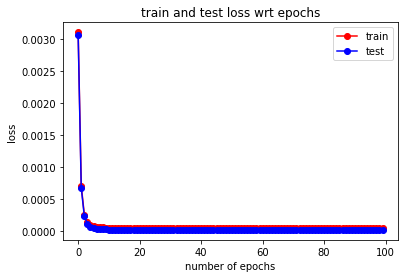

In [25]:
# 1000 epochs, not normalized
plt.plot(train_loss_store,'r-o')
plt.plot(test_loss_store,'b-o')
plt.xlabel('number of epochs')
plt.ylabel('loss')
plt.legend(('train','test'),loc='upper right')
plt.title('train and test loss wrt epochs')
plt.show()

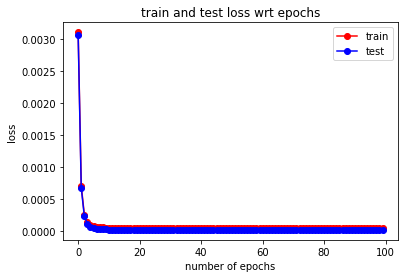

In [26]:
# 100 epochs, not normalized
plt.plot(train_loss_store,'r-o')
plt.plot(test_loss_store,'b-o')
plt.xlabel('number of epochs')
plt.ylabel('loss')
plt.legend(('train','test'),loc='upper right')
plt.title('train and test loss wrt epochs')
plt.show()

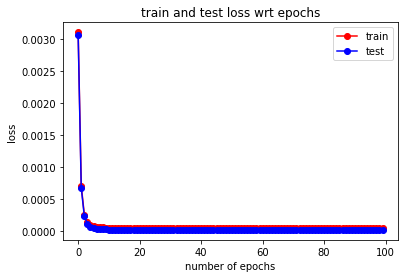

In [27]:
# 1000 epochs, normalized
plt.plot(train_loss_store,'r-o')
plt.plot(test_loss_store,'b-o')
plt.xlabel('number of epochs')
plt.ylabel('loss')
plt.legend(('train','test'),loc='upper right')
plt.title('train and test loss wrt epochs')
plt.show()

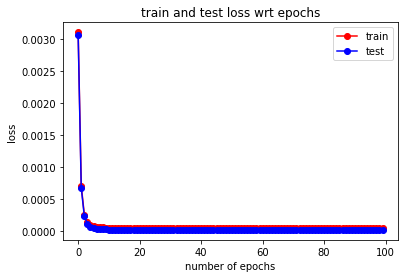

In [28]:
# 100 epochs, normalized
plt.plot(train_loss_store,'r-o')
plt.plot(test_loss_store,'b-o')
plt.xlabel('number of epochs')
plt.ylabel('loss')
plt.legend(('train','test'),loc='upper right')
plt.title('train and test loss wrt epochs')
plt.show()

If loss is increasing, we might want to use a smaller learning rate.

## Plot results

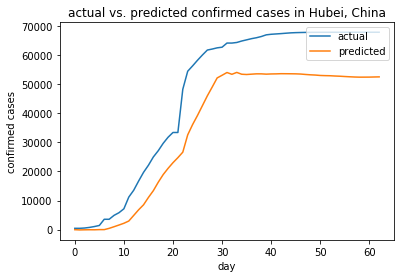

In [29]:
# Test our model on Hubei, China
Xdata_Hubei = Xscaler.transform(np.array(df[df['Place']=='China/Hubei'][col_features]))
Xdata_Hubei = torch.Tensor(Xdata_Hubei)
output = net(Xdata_Hubei).detach().numpy()
output = Yscaler.inverse_transform(output.reshape(-1, 1)).reshape(1, -1)[0] # Denormalize
output = np.cumsum(output) # Cumulatively sum up cases/day to get total confirmed cases

plt.plot(df[df['Place']=='China/Hubei']['ConfirmedCases'].values) # Actual confirmed cases
plt.plot(output)
plt.xlabel('day')
plt.ylabel('confirmed cases')
plt.legend(('actual','predicted'),loc='upper right')
plt.title('actual vs. predicted confirmed cases in Hubei, China')
plt.show()

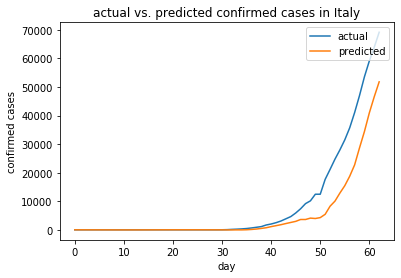

In [30]:
# Test our model on Italy
Xdata_Italy = Xscaler.transform(np.array(df[df['Place']=='Italy'][col_features]))
Xdata_Italy = torch.Tensor(Xdata_Italy)
output = net(Xdata_Italy).detach().numpy()
output = Yscaler.inverse_transform(output.reshape(-1, 1)).reshape(1, -1)[0] # Denormalize
output = np.cumsum(output) # Cumulatively sum up cases/day to get total confirmed cases

plt.plot(df[df['Place']=='Italy']['ConfirmedCases'].values) # Actual confirmed cases
plt.plot(output)
plt.xlabel('day')
plt.ylabel('confirmed cases')
plt.legend(('actual','predicted'),loc='upper right')
plt.title('actual vs. predicted confirmed cases in Italy')
plt.show()

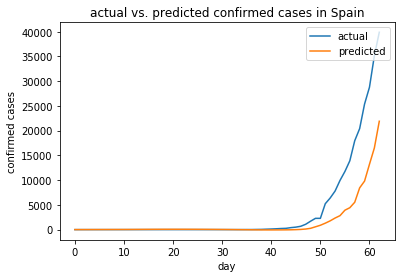

In [31]:
# Test our model on Spain
Xdata_Spain = Xscaler.transform(np.array(df[df['Place']=='Spain'][col_features]))
Xdata_Spain = torch.Tensor(Xdata_Spain)
output = net(Xdata_Spain).detach().numpy()
output = Yscaler.inverse_transform(output.reshape(-1, 1)).reshape(1, -1)[0] # Denormalize
output = np.cumsum(output) # Cumulatively sum up cases/day to get total confirmed cases

plt.plot(df[df['Place']=='Spain']['ConfirmedCases'].values) # Actual confirmed cases
plt.plot(output)
plt.xlabel('day')
plt.ylabel('confirmed cases')
plt.legend(('actual','predicted'),loc='upper right')
plt.title('actual vs. predicted confirmed cases in Spain')
plt.show()

## Permutation feature importance

In [32]:
# True loss
Xdata_all = Xscaler.transform(np.array(df[col_features]))
Xdata_all = torch.Tensor(Xdata_all)
output = net(Xdata_all).detach().numpy()
output = Yscaler.inverse_transform(output.reshape(-1, 1)).reshape(1, -1)[0] # Denormalize
true_loss = loss(torch.Tensor(df['Cases/day'].values), torch.Tensor(output)).item()
print(true_loss)

46268.9765625


In [33]:
# Permutate each columns and calculate loss
import copy

random.seed(300)

col_loss = []
for col in col_features:
    tmp = copy.deepcopy(df)
    tmp[col] = np.random.permutation(df[col].values) # Shuffle the column
    tmp_Xdata_all = Xscaler.transform(np.array(tmp[col_features]))
    tmp_Xdata_all = torch.Tensor(tmp_Xdata_all)
    output = net(tmp_Xdata_all).detach().numpy()
    output = Yscaler.inverse_transform(output.reshape(-1, 1)).reshape(1, -1)[0] # Denormalize
    tmp_loss = loss(torch.Tensor(df['Cases/day'].values), torch.Tensor(output)).item()
    col_loss.append(tmp_loss) # Record the change in loss in percentages

In [34]:
# Record the change in loss in percentages in dictionary. Larger loss indicates larger importance
col_loss_dic = {}
for i in range(len(col_loss)):    
    col_loss_dic[col_features[i]] = (col_loss[i]-true_loss)/true_loss * 100
sorted_loss_dic = {k: v for k, v in sorted(col_loss_dic.items(), key=lambda item: item[1], reverse=True)}

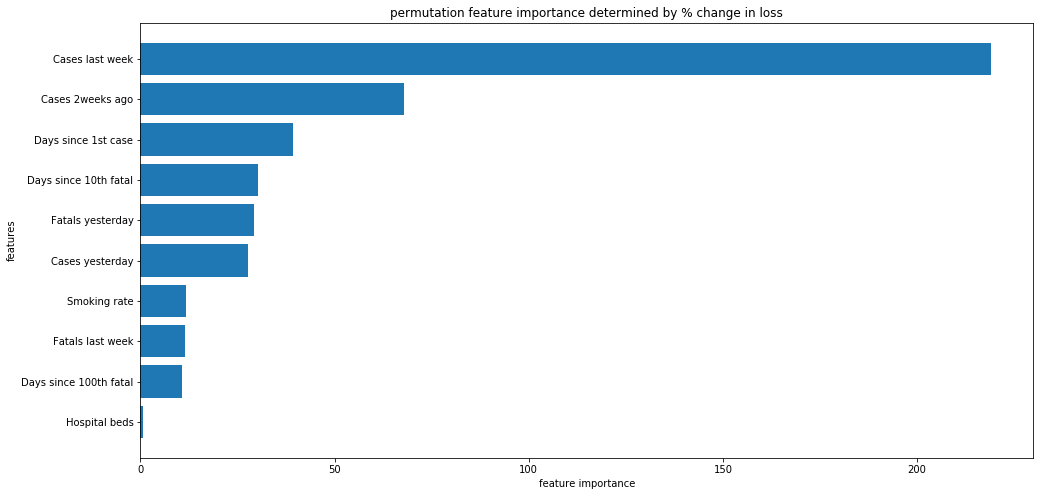

In [35]:
# Visualize feature importance
x = []
y = []
for k, v in sorted_loss_dic.items():
    x.append(k)
    y.append(v)

plt.figure(figsize=(16, 8))
plt.barh(x, y)
plt.gca().invert_yaxis()
plt.xlabel('feature importance')
plt.ylabel('features')
plt.title('permutation feature importance determined by % change in loss')
plt.show()

The importance of GDP is unexpectedly big!

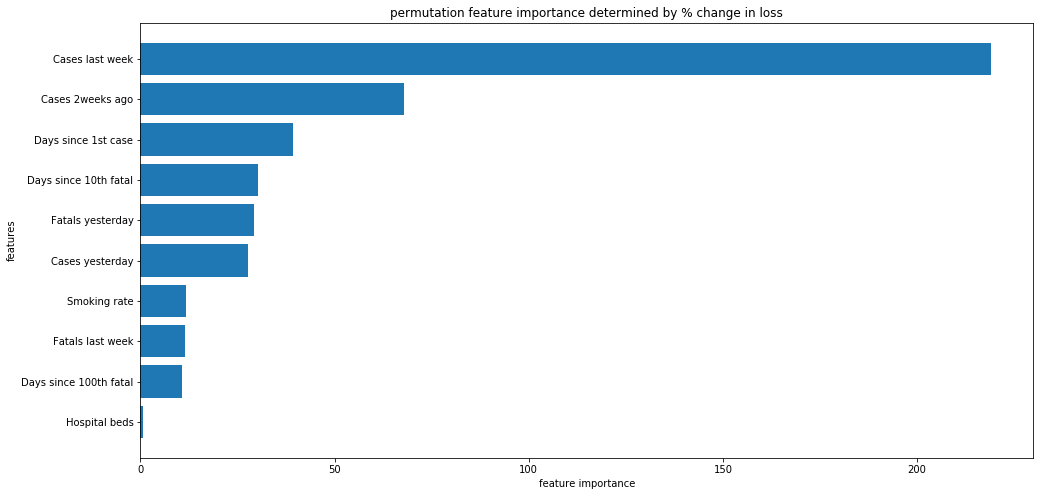

In [36]:
# Visualize feature importance
x = []
y = []
for k, v in sorted_loss_dic.items():
    x.append(k)
    y.append(v)

plt.figure(figsize=(16, 8))
plt.barh(x, y)
plt.gca().invert_yaxis()
plt.xlabel('feature importance')
plt.ylabel('features')
plt.title('permutation feature importance determined by % change in loss')
plt.show()